In [ ]:
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.9 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=4ee28e029b007a82b7d7c87cbbd25002449e5b0df0c5cbc166bcc40ab639c2cb
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
!pip install PySyft  # Reinstall syft to ensure correct structure
# %%
import syft as sy


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/dataset_sdn.csv')

In [ ]:
print(df.head())

      dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no   tx_bytes  \
0  101000000000      3  ...      451         0       UDP        3  143928631   
1  281000000000      2  ...      451         0       UDP        4       3842   
2  201000000000      3  ...      451         0       UDP        1       3795   
3  201000000000      3  ...      451         0       UDP        2       3688   
4  201000000000      3  ...      451         0       UDP        3       3413   

  rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
0     39

In [ ]:
df.shape

(104345, 23)

In [ ]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


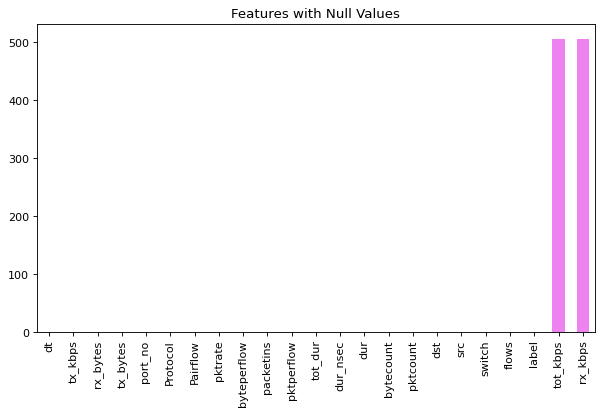

In [ ]:
plt.figure(figsize=(9, 5), dpi=80)
df[df.columns[df.isna().sum() >= 0]].isna().sum().sort_values().plot.bar(color='violet')
plt.title("Features with Null Values")
plt.show()
#this will show the features that has null values

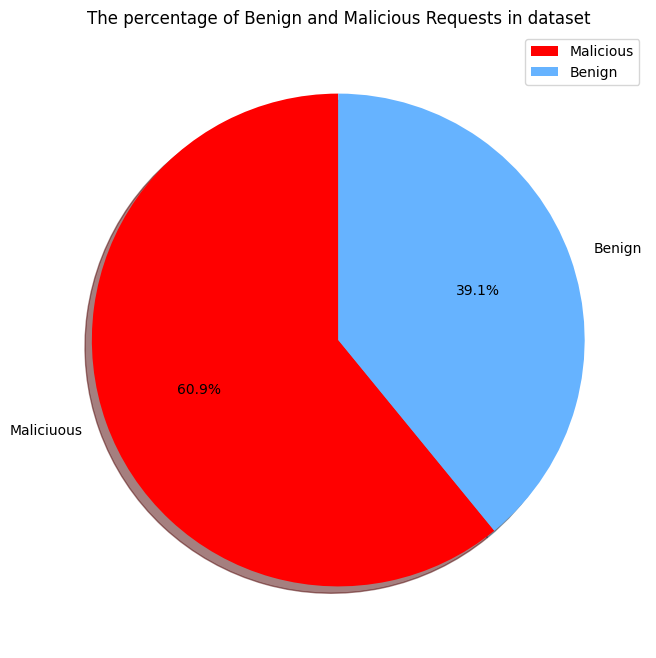

In [ ]:
colors = ['red', '#66b3ff']  # Specify your desired colors here
plt.figure(figsize=(13, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
plt.legend(["Malicious", "Benign"])
plt.title('The percentage of Benign and Malicious Requests in dataset')
plt.show()


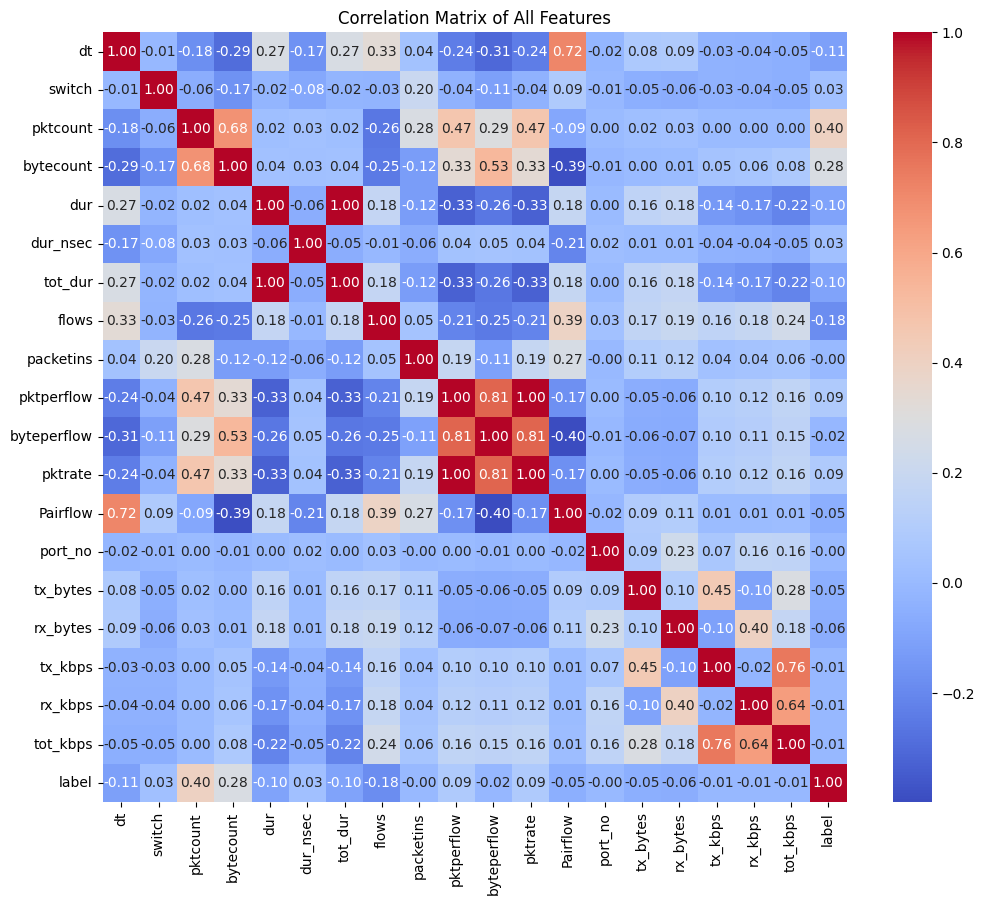

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix for all features
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Features")
plt.show()

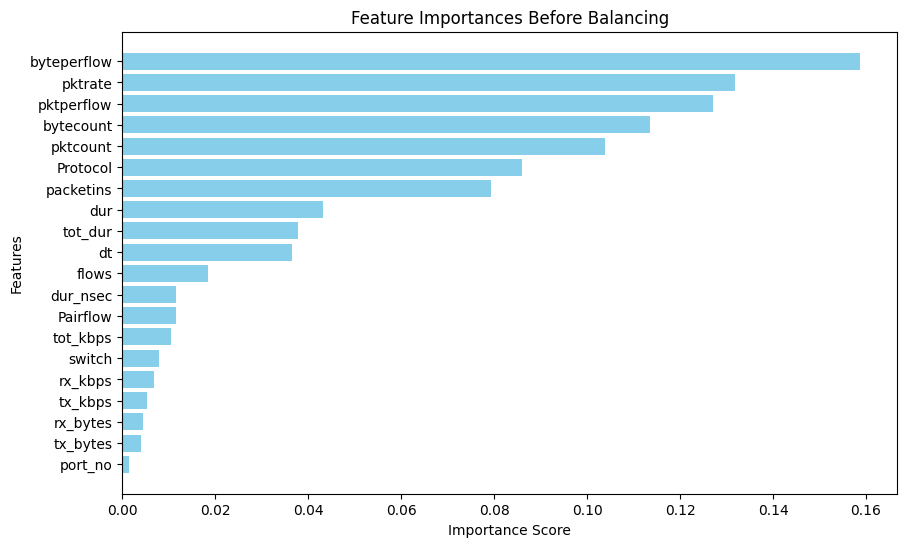

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv("/content/dataset_sdn.csv")

# Impute missing values in numeric columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
numeric_columns = dataset.select_dtypes(include=["float64", "int64"]).columns
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

# Encode categorical variables
dataset["Protocol"] = dataset["Protocol"].astype("category").cat.codes

# Split features and target
X = dataset.drop(columns=["label", "src", "dst"])  # Dropping 'src' and 'dst' columns
y = dataset["label"]

# Feature importance using ExtraTreesClassifier before balancing
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Feature Importances Before Balancing")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validatio

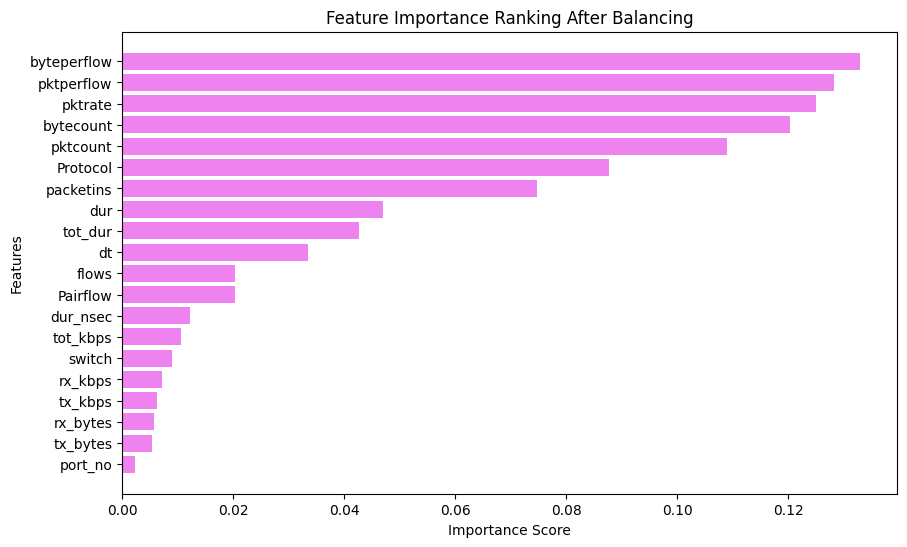

In [ ]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Feature importance using ExtraTreesClassifier after balancing
model_balanced = ExtraTreesClassifier(random_state=42)
model_balanced.fit(X_balanced, y_balanced)
feature_importances_balanced = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model_balanced.feature_importances_
}).sort_values(by="Importance", ascending=False)

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Feature importance using ExtraTreesClassifier after balancing
model_balanced = ExtraTreesClassifier(random_state=42)
model_balanced.fit(X_balanced, y_balanced)
feature_importances_balanced = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model_balanced.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_balanced["Feature"], feature_importances_balanced["Importance"], color="violet") # Use 'color' instead of 'palette'
plt.gca().invert_yaxis()
plt.title("Feature Importance Ranking After Balancing")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


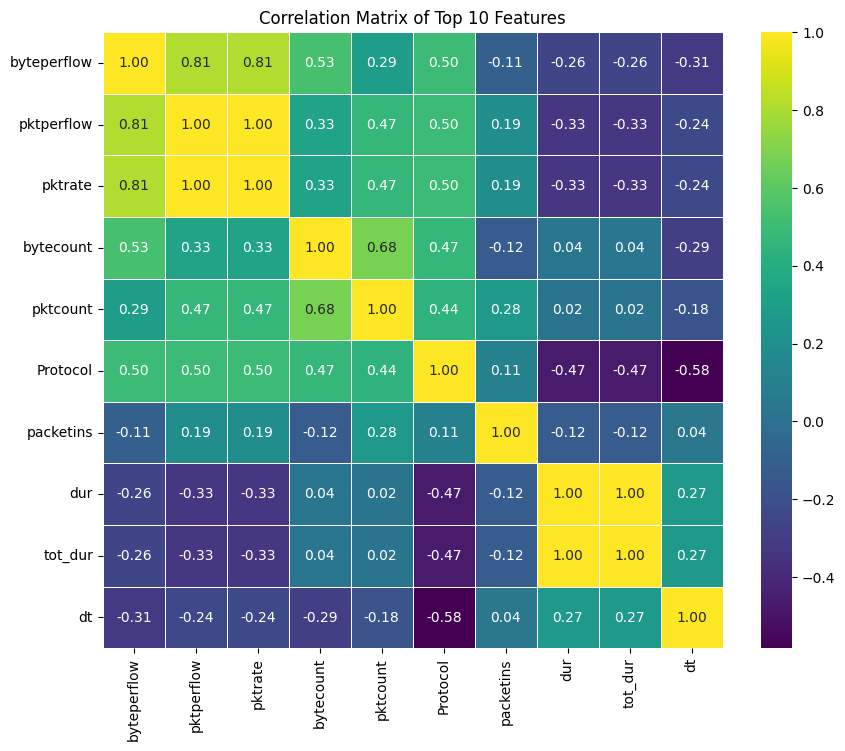

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_importances_balanced' DataFrame from the previous code
top_10_features = feature_importances_balanced.head(10)['Feature'].tolist()
top_10_df = X[top_10_features]

# Calculate the correlation matrix
correlation_matrix = top_10_df.corr()

# Create a heatmap with vibrant colors
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)  # Use a vibrant colormap
plt.title('Correlation Matrix of Top 10 Features')
plt.show()

Using Federate Leanrning (FL) For DDoS Detection


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import syft as sy

# Simulated Federated Environment
# Split the dataset into multiple clients
NUM_CLIENTS = 3

# Load dataset
dataset = pd.read_csv("/content/dataset_sdn.csv")

# Impute missing values in numeric columns
imputer = SimpleImputer(strategy="mean")
numeric_columns = dataset.select_dtypes(include=["float64", "int64"]).columns
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

# Encode categorical variables
dataset["Protocol"] = dataset["Protocol"].astype("category").cat.codes

# Split features and target
X = dataset.drop(columns=["label", "src", "dst"])  # Dropping 'src' and 'dst' columns
y = dataset["label"]

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Feature importance using ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X_balanced, y_balanced)
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Select top features
top_features = feature_importances.head(10)["Feature"].tolist()
X_balanced_selected = X_balanced[top_features]

# Apply scaling using StandardScaler
scaler = StandardScaler()
X_balanced_selected = scaler.fit_transform(X_balanced_selected)

# Simulate splitting the data among clients
client_data = []
client_labels = []

split_size = len(X_balanced_selected) // NUM_CLIENTS
for i in range(NUM_CLIENTS):
    start_idx = i * split_size
    end_idx = start_idx + split_size
    client_data.append(X_balanced_selected[start_idx:end_idx])
    client_labels.append(y_balanced[start_idx:end_idx])

# Initialize PySyft Virtual Workers
clients = [sy.VirtualWorker(hook=sy.TorchHook(), id=f"client_{i}") for i in range(NUM_CLIENTS)]

# Federated Learning Process
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple model
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Send data to respective clients
federated_data = [(torch.tensor(data).float().send(client), torch.tensor(labels).float().send(client))
                  for data, labels, client in zip(client_data, client_labels, clients)]

# Federated Training
input_size = X_balanced_selected.shape[1]
model = SimpleNN(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 10
for epoch in range(epochs):
    epoch_loss = 0
    for client_idx, (data, labels) in enumerate(federated_data):
        # Send model to client
        model.send(clients[client_idx])

        # Forward pass
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()

        # Backward pass and optimization
        optimizer.step()
        model.get()  # Get model back from client
        epoch_loss += loss.get().item()  # Get loss back from client

    print(f"Epoch {epoch + 1}, Loss: {epoch_loss}")

# Model evaluation (centralized aggregation of evaluation data)
X_train, X_test, y_train, y_test = train_test_split(X_balanced_selected, y_balanced, test_size=0.3, random_state=42)
model.eval()
with torch.no_grad():
    test_data = torch.tensor(X_test).float()
    predictions = model(test_data).squeeze()
    y_pred = (predictions.numpy() > 0.5).astype(int)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: module 'syft' has no attribute 'VirtualWorker'

In [ ]:
#At first Evolutionary algorithm (TPOT MODEL)


import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Load dataset
dataset = pd.read_csv("/content/dataset_sdn.csv")

# Impute missing values in numeric columns
imputer = SimpleImputer(strategy="mean")
numeric_columns = dataset.select_dtypes(include=["float64", "int64"]).columns
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

# Encode categorical variables
dataset["Protocol"] = dataset["Protocol"].astype("category").cat.codes

# Split features and target
X = dataset.drop(columns=["label", "src", "dst"])  # Dropping 'src' and 'dst' columns
y = dataset["label"]

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Feature importance using ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X_balanced, y_balanced)
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Select top features
top_features = feature_importances.head(10)["Feature"].tolist()
X_balanced_selected = X_balanced[top_features]

# Apply scaling using StandardScaler
scaler = StandardScaler()
X_balanced_selected = scaler.fit_transform(X_balanced_selected)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced_selected, y_balanced, test_size=0.3, random_state=42
)

# TPOT optimization
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    config_dict='TPOT light',
    random_state=42,
    n_jobs=-1
)
tpot.fit(X_train, y_train)

# Evaluate the model
y_pred = tpot.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

# Export the best pipeline
tpot.export("best_tpot_pipeline.py")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_regressor


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9988312636961286

Generation 2 - Current best internal CV score: 0.9988312636961286

Generation 3 - Current best internal CV score: 0.9988649772433555

Generation 4 - Current best internal CV score: 0.9988649772433555

Generation 5 - Current best internal CV score: 0.9988649772433555

Best pipeline: KNeighborsClassifier(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=17), n_neighbors=73, p=2, weights=distance)
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19189
         1.0       1.00      1.00      1.00     18948

    accuracy                           1.00     38137
   macro avg       1.00      1.00      1.00     38137
weighted avg       1.00      1.00      1.00     38137

F1 Score: 0.9987319702012998
Precision: 0.9998413202158045
Recall: 0.9976250791640279
Accuracy: 0.9987413797624354


In [ ]:
top_features = feature_importances.head(10)["Feature"].tolist()
print("Selected Top Features:", top_features)
print(feature_importances)
print("Features in the final dataset:", top_features) # Changed this line to use 'top_features'


Selected Top Features: ['byteperflow', 'pktperflow', 'pktrate', 'bytecount', 'pktcount', 'Protocol', 'packetins', 'dur', 'tot_dur', 'dt']
        Feature  Importance
10  byteperflow    0.132973
9    pktperflow    0.128133
11      pktrate    0.125045
3     bytecount    0.120365
2      pktcount    0.108995
13     Protocol    0.087748
8     packetins    0.074777
4           dur    0.047024
6       tot_dur    0.042666
0            dt    0.033498
7         flows    0.020322
12     Pairflow    0.020252
5      dur_nsec    0.012206
19     tot_kbps    0.010527
1        switch    0.008875
18      rx_kbps    0.007174
17      tx_kbps    0.006197
16     rx_bytes    0.005697
15     tx_bytes    0.005270
14      port_no    0.002255
Features in the final dataset: ['byteperflow', 'pktperflow', 'pktrate', 'bytecount', 'pktcount', 'Protocol', 'packetins', 'dur', 'tot_dur', 'dt']


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv("/content/dataset_sdn.csv")

# Impute missing values in numeric columns
imputer = SimpleImputer(strategy="mean")
numeric_columns = dataset.select_dtypes(include=["float64", "int64"]).columns
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

# Encode categorical variables
dataset["Protocol"] = dataset["Protocol"].astype("category").cat.codes

# Split features and target
X = dataset.drop(columns=["label", "src", "dst"])  # Dropping 'src' and 'dst' columns
y = dataset["label"]

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Manually select features
selected_features = [
    'byteperflow', 'pktperflow', 'pktrate', 'pktcount',
    'Protocol', 'packetins', 'dur', 'tot_dur', 'dt', 'bytecount'  # Example features, replace with your 10 features
]
X_balanced_selected = X_balanced[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced_selected, y_balanced, test_size=0.3, random_state=42
)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors based on your dataset
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     19189
         1.0       0.97      0.97      0.97     18948

    accuracy                           0.97     38137
   macro avg       0.97      0.97      0.97     38137
weighted avg       0.97      0.97      0.97     38137

Accuracy: 0.9701339906127907
F1 Score: 0.9699559494605787
Precision: 0.9695723250540527
Recall: 0.9703398775596369


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report,  accuracy_score,f1_score, precision_score, recall_score
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv("/content/dataset_sdn.csv")

# Impute missing values in numeric columns
imputer = SimpleImputer(strategy="mean")
numeric_columns = dataset.select_dtypes(include=["float64", "int64"]).columns
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

# Encode categorical variables
dataset["Protocol"] = dataset["Protocol"].astype("category").cat.codes

# Split features and target
X = dataset.drop(columns=["label", "src", "dst"])  # Dropping 'src' and 'dst' columns
y = dataset["label"]

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Manually select features
selected_features = [
    'byteperflow', 'pktperflow', 'pktrate', 'pktcount',
    'Protocol', 'packetins', 'dur', 'tot_dur', 'dt', 'bytecount' # Example features, replace with your 10 features
]
X_balanced_selected = X_balanced[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced_selected, y_balanced, test_size=0.3, random_state=42
)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19189
         1.0       1.00      1.00      1.00     18948

    accuracy                           1.00     38137
   macro avg       1.00      1.00      1.00     38137
weighted avg       1.00      1.00      1.00     38137

F1 Score: 0.9998416468725257
Precision: 1.0
Recall: 0.9996833438885371
Accuracy: 0.9998426724703044


In [ ]:
# prompt: Use Random forest for this dataset

from sklearn.ensemble import RandomForestClassifier

# ... (Your existing code for data loading, preprocessing, and feature selection) ...

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19189
         1.0       1.00      1.00      1.00     18948

    accuracy                           1.00     38137
   macro avg       1.00      1.00      1.00     38137
weighted avg       1.00      1.00      1.00     38137

Accuracy: 0.999895114980203
F1 Score: 0.999894436820437
Precision: 1.0
Recall: 0.9997888959256913


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
dataset = pd.read_csv('/content/dataset_sdn.csv')

# Impute missing values
imputer = SimpleImputer(strategy="mean")
numeric_columns = dataset.select_dtypes(include=["float64", "int64"]).columns
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

# Encode categorical variables (if any)
if "Protocol" in dataset.columns:
    dataset["Protocol"] = dataset["Protocol"].astype("category").cat.codes

# Extract features and target
X = dataset.drop(columns=["label", "src", "dst"], errors="ignore")  # Drop unnecessary columns
y = dataset["label"]

# Encode target variable (if not numeric)
if y.dtype == "object":
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build the Neural Network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1826/1826 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8409 - loss: 0.3391 - val_accuracy: 0.9570 - val_loss: 0.1130
Epoch 2/20
1826/1826 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9477 - loss: 0.1364 - val_accuracy: 0.9622 - val_loss: 0.0948
Epoch 3/20
1826/1826 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9554 - loss: 0.1144 - val_accuracy: 0.9692 - val_loss: 0.0757
Epoch 4/20
1826/1826 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9616 - loss: 0.0928 - val_accuracy: 0.9752 - val_loss: 0.0634
Epoch 5/20
1826/1826 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9678 - loss: 0.0815 - val_accuracy: 0.9817 - val_loss: 0.0511
Epoch 6/20
1826/1826 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9748 - loss: 0.0657 - val_accuracy: 0.9825 - val_loss: 0.0464
Epoch 7/20
1826/1826 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9776 - loss: 0.0606 - val_accuracy: 0.9838 - val_loss: 0.0416
Epoch 8/20
1826/1826 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9786 - loss: 0.0580 

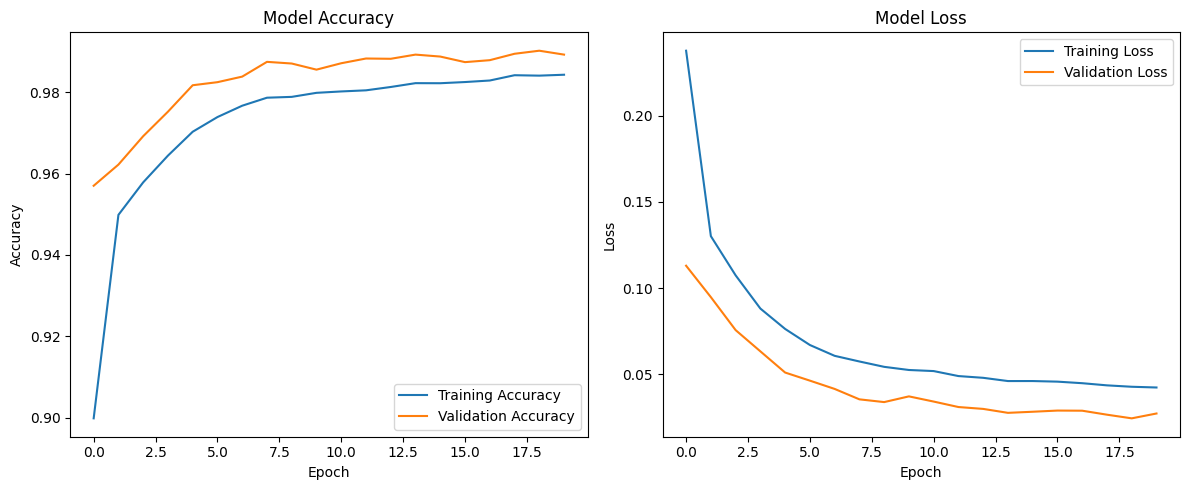

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


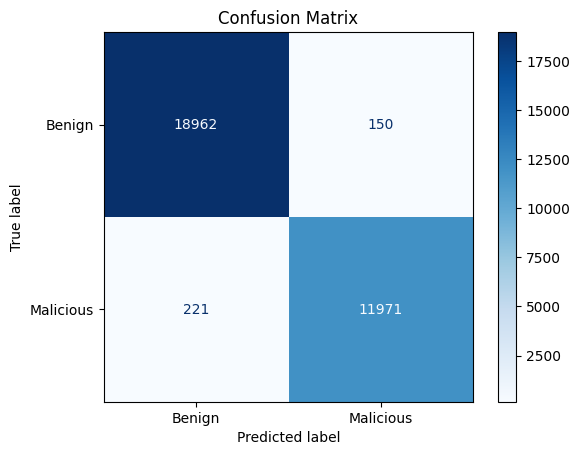

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()
